# <font color='blue'><div style="text-align: center">kNN</font> 

## 1. kNN 소개
    
* kNN은 k Nearest Neighbor 의 약자임
* "네 친구들을 보면 너를 알 수 있다"를 수학적으로 구현함    
* 아래는 사과, 베이컨, 바나나, 당근, 샐러리치즈에 대한 단맛과 아삭거림 정도를 표현한 자료이다.<br>
   토마토는 과일일까? 아니면 채소일까?
   
    ![bigdata]( https://drive.google.com/uc?id=1OzCu_AbF5vP4F-F4WOQWytvLO91sPwBx)  
    ![bigdata](https://drive.google.com/uc?id=1GP61E5dFesHHMuGQpDbHW8FBnjc35nTp)

* 토마토는 
    오렌지, 포도, 땅콩, 완두콩 중 어디에 더 가까운가?<br>

$$ dist(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2} $$<br>

    
* 토마토는 과일인 오렌지에 가깝다. 그러므로, 토마토는 과일로 판정한다.
* 이 방법은 가장 가까운 한 개와 거리로 의사결정을 했기 때문에 1NN이다.
* 3NN 의사결정 방법은 토마토와 가장 가까운 (오렌지, 포도, 땅콩) 3개를 찾고 이들이 과일2종류, 단백질 1종류이므로
다수결에 의해 과일로 판정한다.
* 일반적으로, k=3~10 사이에서 결정한다. 혹은, 훈련 데이터 개수의 제곱근 값을 쓴다.
* 하지만, 이것보다는 훈련 데이터로 모형을 만들고 그 결과를 테스트 데이터에서 성과를 측정해 적절한 k를 결정하는 것이
합리적이다.
* k가 작으면 몇 개의 잘못된 데이터들이 판단에 영향을 미칠 수 있고, k가 크면  다수의
데이터가 판단에 참여해 안정적인 판단을 할 수는 있으나 가까이 있는 것과 멀리 있는 것이 같은 정도로 의사결정에
참여하는 단점을 가지고 있다.    

*  kNN은 거리에 의해 유사도를 측정하기 때문에 모든 입력변수는 양적변수이고 Scale을 통일해야 한다.<br>
   이러한 조건이 위배되면 계산이 되더라도 부정확한 결과를 줄 수 있으므로 주의해야 한다

   
## 2. 유방암 영상 판정    
* kNN 알고리즘을 이용하여 유방암 여부를 판별해보자.
* 데이터는  wisc_bc_data.csv 이고 이미 환자의 영상을 처리하여 여러개의 feature를 만들어 놨다.    
* 자료는 ID, diagnosis(B: 양성, M:악성), 그리고 조직에 대한 크기, 면적, 대칭성 등의 자료로 구성되어 있다.
* 우리는 diagnosis와 조직에 대한 정보를 Supervised Learning을 통해 학습한 후,
새로운 환자의 조직정보를 주면 이 환자가 양성인지, 악성인지 자동으로 판별하여 의사에게 알려주고자 한다. 
* 분석을 수행해보자.

### 데이터 읽기
    

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/gdrive/My Drive/IICEE/data/wisc_bc_data.csv', sep=",")  # pandas dataframe object

In [ ]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,0.2864,1.4400,2.206,20.30,0.007278,0.020470,0.04447,0.008799,0.01868,0.003339,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.97,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,0.5648,1.9300,3.909,52.72,0.008824,0.031080,0.03112,0.012910,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.06481,0.3550,1.5340,2.302,23.13,0.007595,0.022190,0.02880,0.008614,0.02710,0.003451,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,0.1601,0.8225,1.355,10.80,0.007416,0.018770,0.02758,0.010100,0.02348,0.002917,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


In [ ]:
len(data)

569

In [ ]:
data.shape       # dataframe을 행렬로 보고 행과 열의 수를 리턴

(569, 32)

In [ ]:
res = data['diagnosis'].value_counts()
print(res)

B    357
M    212
Name: diagnosis, dtype: int64


In [ ]:
#res = data['radius_mean'].groupby(data['diagnosis']).mean()
data.groupby(['diagnosis'])['radius_mean'].mean()
#print(res)

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64

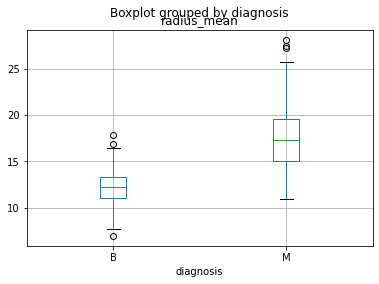

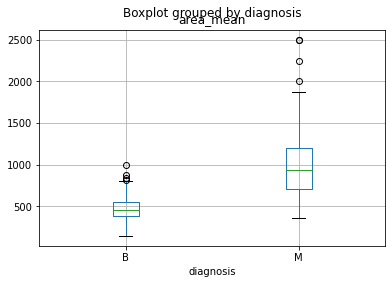

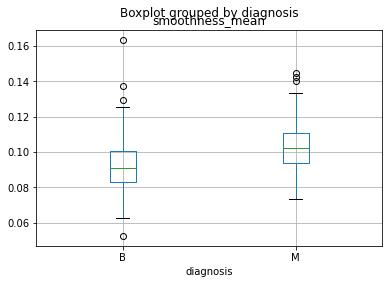

In [ ]:
data.boxplot(column=['radius_mean'],by='diagnosis')
data.boxplot(column=['area_mean'],by='diagnosis')
data.boxplot(column=['smoothness_mean'],by='diagnosis')

In [ ]:
from scipy import stats
smoothness_B = data[data['diagnosis'] == 'B']['smoothness_mean']
smoothness_M = data[data['diagnosis'] == 'M']['smoothness_mean']
stats.ttest_ind(smoothness_B, smoothness_M)


Ttest_indResult(statistic=-9.146098808149002, pvalue=1.0518503592035268e-18)

In [ ]:
radius_mean_B = data[data['diagnosis'] == 'B']['radius_mean']
radius_mean_M = data[data['diagnosis'] == 'M']['radius_mean']
stats.ttest_ind(radius_mean_B, radius_mean_M)

Ttest_indResult(statistic=-25.435821610057058, pvalue=8.465940572262422e-96)

* t-Test:두집단 간의 평균 차이가 유의미한 차이가 있는가를 판정하는 통계 기법으로 t 값의 절대값이 크면 두 집단간의 차이가 크다고 판단한다.

$$ t = \frac {\bar X_1 - \bar X_2} {\sqrt{S_1^2/n_1 + S_2^2/n_2 }}$$


* pandas data frame을 numpy array 로 변환

In [ ]:
from sklearn import neighbors, datasets
import numpy as np      # numpy는 행렬을 다루는 라이브러리
X = data.to_numpy()
X = X[:,2:]
X

array([[12.32, 12.39, 78.85, ..., 0.09391000000000001, 0.2827, 0.06771],
       [10.6, 18.95, 69.28, ..., 0.07926, 0.294, 0.07587],
       [11.04, 16.83, 70.92, ..., 0.07431, 0.2998, 0.07881],
       ...,
       [15.28, 22.41, 98.92, ..., 0.1226, 0.3175, 0.09772],
       [14.53, 13.98, 93.86, ..., 0.1069, 0.2606, 0.0781],
       [21.37, 15.1, 141.3, ..., 0.1966, 0.273, 0.08666]], dtype=object)

In [ ]:
X.shape

(569, 30)

* 표준화

In [ ]:
# StandardScaler
from sklearn.preprocessing import scale, minmax_scale
Z = minmax_scale(X)

In [ ]:
Z

array([[0.25268588, 0.0906324 , 0.24227766, ..., 0.32271478, 0.24876799,
        0.08310376],
       [0.17128118, 0.31247886, 0.17614539, ..., 0.27237113, 0.27104278,
        0.136626  ],
       [0.19210564, 0.24078458, 0.18747841, ..., 0.25536082, 0.28247585,
        0.15590975],
       ...,
       [0.3927777 , 0.42948935, 0.38096883, ..., 0.42130584, 0.31736645,
        0.27994228],
       [0.35728146, 0.14440311, 0.34600235, ..., 0.36735395, 0.20520402,
        0.15125279],
       [0.68100715, 0.18227934, 0.67383042, ..., 0.67560137, 0.22964715,
        0.20739866]])

* taget 값 생성 t = f(Z) 형태로 전환

In [ ]:
data['target'] = data['diagnosis'].map({'B': 0, 'M': 1})
y = np.array(data['target'])
y


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

* Train / Test Set 분리(Test Set 크기 30%)



In [ ]:
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.3)

* 3NN 모형을 만들고 모형의 정확도 측정

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Z_train, y_train)
pred = knn.predict(Z_test)

In [ ]:
pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
y_test

(171,)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, pred))

[[110   1]
 [  3  57]]


### <font color='blue'> <div style="text-align: center">End of Chapter </font>  